<a href="https://colab.research.google.com/github/Yash2G3/fir_se_try_karte_hai/blob/main/ASD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import MinMaxScaler , StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

In [2]:
asd = pd.read_csv("train_final_i_think.csv")
asd_t=pd.read_csv("test_final_i_think.csv")
print("Dataset loaded...")

Dataset loaded...


In [3]:
asd=asd[0:2094]
asd_t=asd_t[0:400]

In [4]:
asd

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,1,0,1,0,1,0,1,0,1,...,f,Unkown,no,no,Austria,no,6,18 and more,Self,0
1,1,0,0,0,0,0,0,0,0,0,...,m,Unkown,no,no,India,no,0,18 and more,Self,0
2,2,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,10,18 and more,Self,1
3,3,0,0,0,0,0,0,0,0,0,...,f,Unkown,no,no,United States,no,0,18 and more,Self,0
4,4,0,0,0,0,0,0,0,0,0,...,m,Unkown,no,no,South Africa,no,0,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,2089,1,1,0,1,0,0,0,1,0,...,m,Latino,yes,yes,Costa Rica,no,5,18 and more,Parent,0
2090,2090,1,0,0,0,0,0,0,1,0,...,m,Hispanic,no,no,United States,no,3,18 and more,Self,0
2091,2091,1,0,0,0,0,0,0,1,0,...,f,Asian,no,no,United Kingdom,no,2,18 and more,Self,0
2092,2092,0,1,0,1,0,0,0,1,0,...,m,White-European,no,yes,United Kingdom,no,3,18 and more,Self,0


In [5]:
asd = asd.sample(frac=1)

In [6]:
asd.head()

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
662,662,1,1,1,0,0,1,0,1,1,...,m,Asian,no,no,Burundi,no,7,18 and more,Health care professional,1
756,756,0,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,9,18 and more,Self,1
1955,1955,1,1,1,1,1,1,0,1,1,...,f,Asian,no,no,China,no,9,18 and more,Self,1
1290,1290,1,1,1,1,1,0,0,1,1,...,f,White-European,no,yes,Sweden,no,8,18 and more,Self,1
767,767,1,1,1,1,1,1,1,1,1,...,m,White-European,yes,yes,United Kingdom,no,10,18 and more,Self,0


In [7]:
asd.describe()

,Unnamed: 0,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result,Class/ASD
count,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000,2094.000000
mean,1046.500000,0.645177,0.494269,0.503820,0.482808,0.506686,0.379656,0.440306,0.577364,0.436008,0.618434,5.084527,0.289398
std,604.630052,0.478574,0.500087,0.500105,0.499824,0.500075,0.485417,0.496542,0.494097,0.496007,0.485887,2.952081,0.453591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,523.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,1046.500000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,0.000000
75%,1569.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000
max,2093.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000


In [8]:
asd.columns

Index(['Unnamed: 0', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
       'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [9]:
asd.drop(['age_desc', 'used_app_before'], axis = 1, inplace = True)
asd_t.drop(['age_desc', 'used_app_before'], axis = 1, inplace = True)
asd.columns

Index(['Unnamed: 0', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
       'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [10]:
asd.dtypes

Unnamed: 0        int64
A1_Score          int64
A2_Score          int64
A3_Score          int64
A4_Score          int64
A5_Score          int64
A6_Score          int64
A7_Score          int64
A8_Score          int64
A9_Score          int64
A10_Score         int64
age              object
gender           object
ethnicity        object
jaundice         object
austim           object
contry_of_res    object
result            int64
relation         object
Class/ASD         int64
dtype: object

<Axes: xlabel='Class/ASD', ylabel='count'>

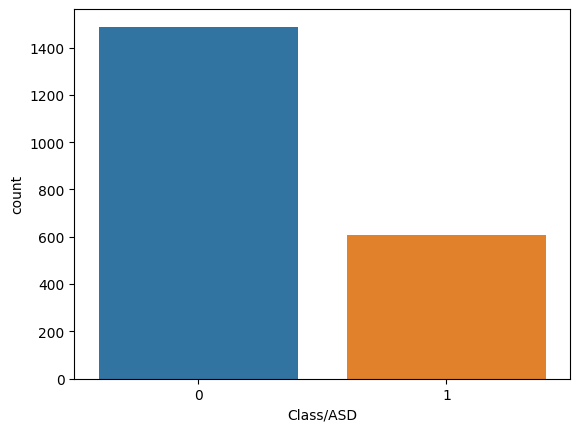

In [11]:
sns.countplot(x='Class/ASD' , data=asd)

<Axes: >

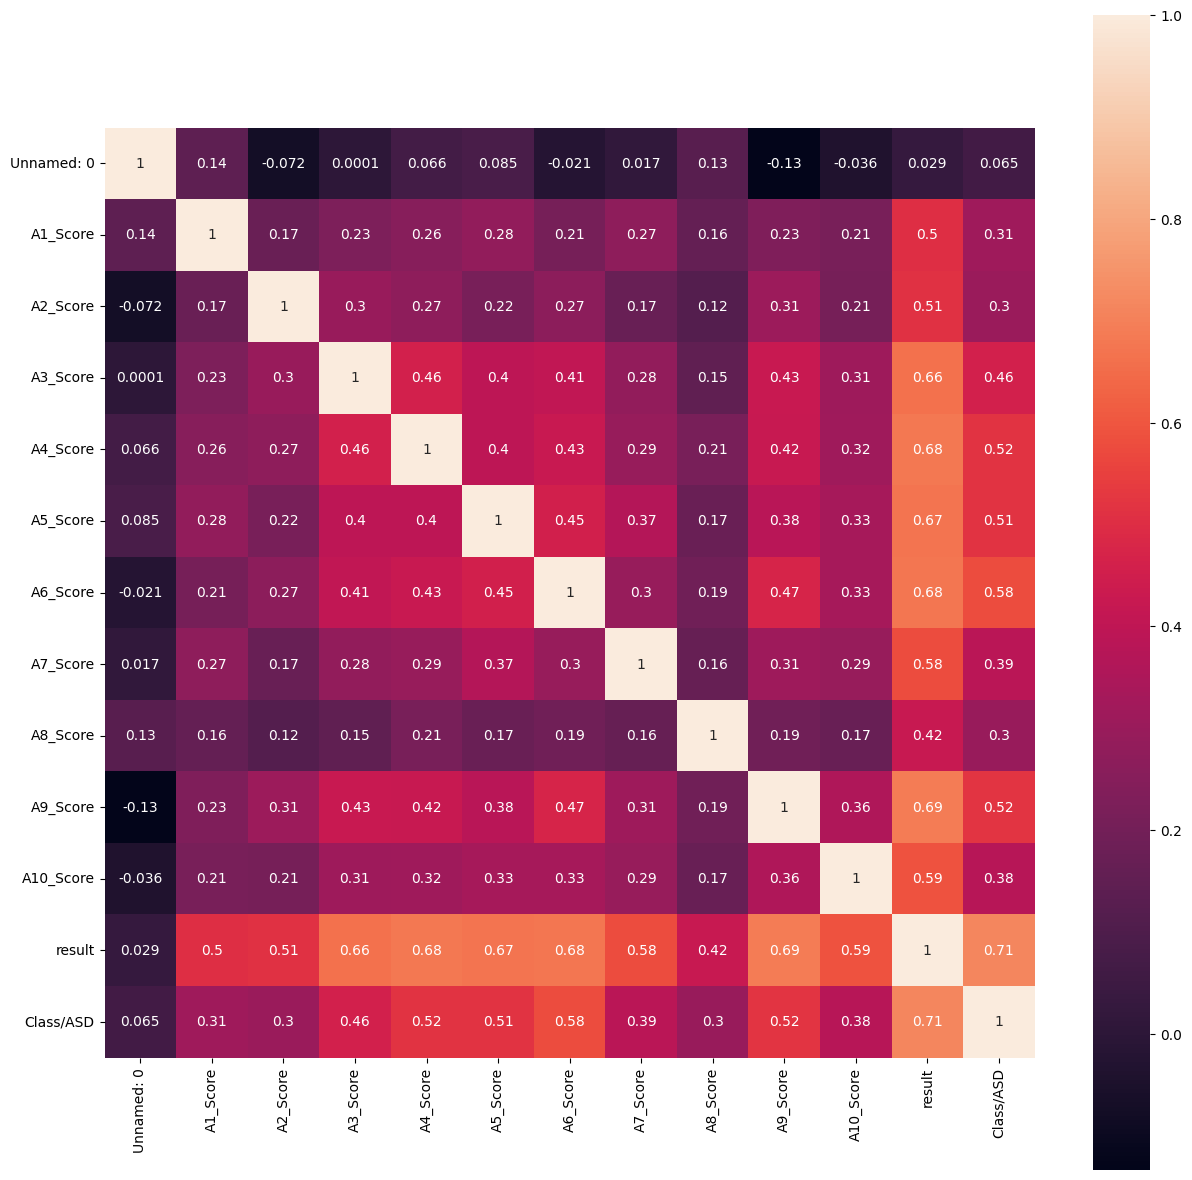

In [12]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Asian'),
  Text(1, 0, 'White-European'),
  Text(2, 0, 'South Asian'),
  Text(3, 0, 'Others'),
  Text(4, 0, 'Middle Eastern '),
  Text(5, 0, 'Turkish'),
  Text(6, 0, 'Hispanic'),
  Text(7, 0, 'Black'),
  Text(8, 0, 'Unkown'),
  Text(9, 0, 'Pasifika'),
  Text(10, 0, 'Latino'),
  Text(11, 0, 'others')])

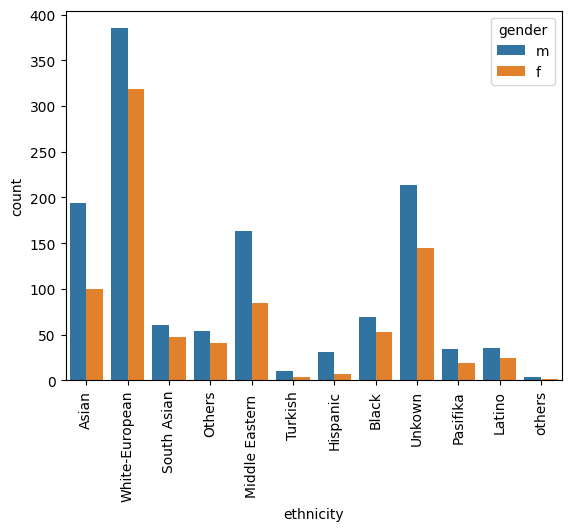

In [13]:
sns.countplot(x='ethnicity',hue='gender',data=asd)
plt.xticks(rotation=90)

<Axes: xlabel='ethnicity', ylabel='count'>

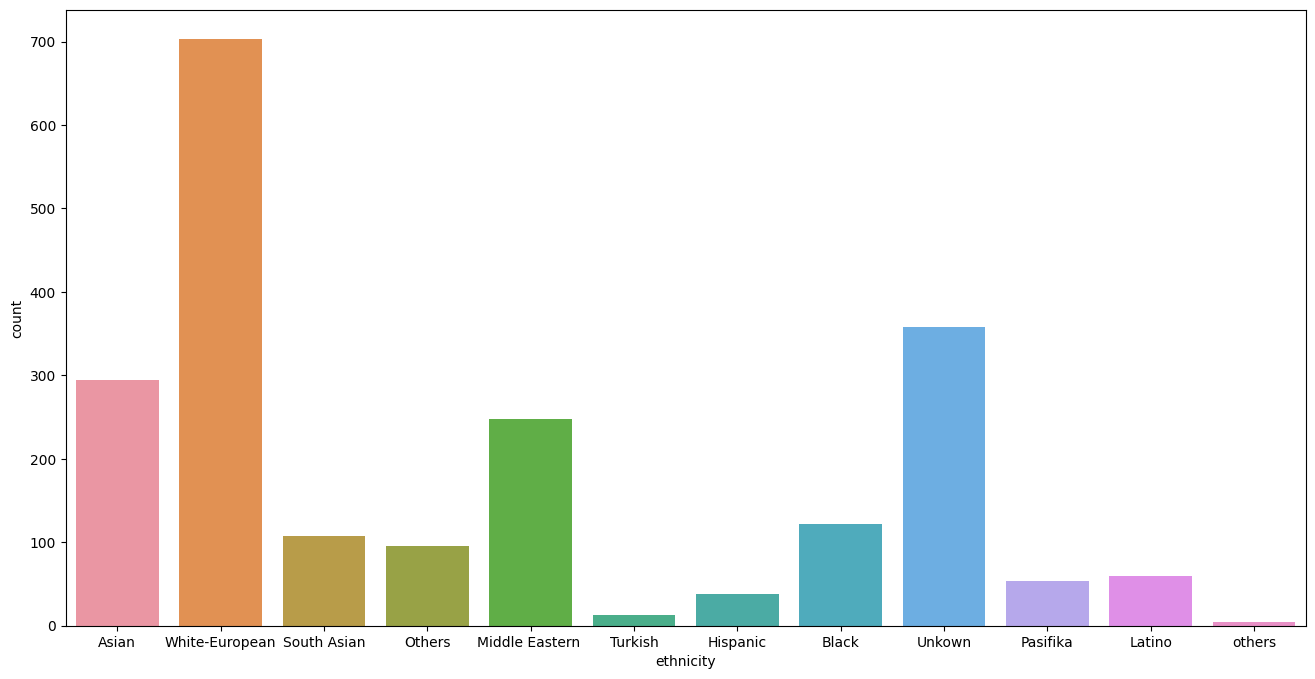

In [14]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'ethnicity', data = asd)

In [15]:
asd.columns

Index(['Unnamed: 0', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score',
       'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age', 'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [16]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 662 to 788
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2094 non-null   int64 
 1   A1_Score       2094 non-null   int64 
 2   A2_Score       2094 non-null   int64 
 3   A3_Score       2094 non-null   int64 
 4   A4_Score       2094 non-null   int64 
 5   A5_Score       2094 non-null   int64 
 6   A6_Score       2094 non-null   int64 
 7   A7_Score       2094 non-null   int64 
 8   A8_Score       2094 non-null   int64 
 9   A9_Score       2094 non-null   int64 
 10  A10_Score      2094 non-null   int64 
 11  age            2094 non-null   object
 12  gender         2094 non-null   object
 13  ethnicity      2094 non-null   object
 14  jaundice       2094 non-null   object
 15  austim         2094 non-null   object
 16  contry_of_res  2094 non-null   object
 17  result         2094 non-null   int64 
 18  relation       2094 non-nul

In [20]:
le = LabelEncoder()
columns = ['ethnicity','contry_of_res', 'relation', 'Class/ASD', 'age', 'jaundice','gender','austim']
columns_t = ['ethnicity','contry_of_res', 'relation', 'age', 'jaundice','gender','austim']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
for col in columns_t:
    asd_t[col] = le.fit_transform(asd_t[col])
asd.dtypes

Unnamed: 0       int64
A1_Score         int64
A2_Score         int64
A3_Score         int64
A4_Score         int64
A5_Score         int64
A6_Score         int64
A7_Score         int64
A8_Score         int64
A9_Score         int64
A10_Score        int64
age              int64
gender           int64
ethnicity        int64
jaundice         int64
austim           int64
contry_of_res    int64
result           int64
relation         int64
Class/ASD        int64
dtype: object

In [22]:
X= asd.drop(['Class/ASD'], axis = 1)
Y= asd['Class/ASD']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)
print('Processed...')

Processed...


In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
preds = logreg.predict(x_test)
logreg.score(x_train, y_train)

0.8764179104477612

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report(y_test, preds)

'              precision    recall  f1-score   support\n\n           0       0.91      0.92      0.91       296\n           1       0.79      0.77      0.78       123\n\n    accuracy                           0.87       419\n   macro avg       0.85      0.84      0.85       419\nweighted avg       0.87      0.87      0.87       419\n'

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.79      0.82      0.81       296\n           1       0.53      0.48      0.50       123\n\n    accuracy                           0.72       419\n   macro avg       0.66      0.65      0.66       419\nweighted avg       0.72      0.72      0.72       419\n'

In [25]:
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test != pred))

In [26]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.73      0.96      0.83       296\n           1       0.63      0.15      0.25       123\n\n    accuracy                           0.73       419\n   macro avg       0.68      0.56      0.54       419\nweighted avg       0.70      0.73      0.66       419\n'

In [27]:
confusion_matrix(y_test, pred)

array([[285,  11],
       [104,  19]])

In [28]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.71      1.00      0.83       296\n           1       0.00      0.00      0.00       123\n\n    accuracy                           0.71       419\n   macro avg       0.35      0.50      0.41       419\nweighted avg       0.50      0.71      0.58       419\n'

In [29]:
confusion_matrix(y_test,pred)


array([[296,   0],
       [123,   0]])

In [30]:
models = []
models.append(('Logistic Regression:', LogisticRegression()))
models.append(('Naive Bayes        :', GaussianNB()))
models.append(('SVM                :', SVC()))


for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

Logistic Regression: 0.8735083532219571
Naive Bayes        : 0.9116945107398569
SVM                : 0.7064439140811456
